# Data Exploration (3):
## Collocation Analyses
* This notebook focuses on looking deeper into the individual words and their collocates to get a better sense of the type of words used in association. 
    * Since the data collected were news articles, most of the sentiment of words used would be neutral or difficult to deduce from a sentiment analysis. As a result, it would be more accurate to analyze it in this manner.


---

### Setup
* includes additional modules, functions, and chars_to_strip

In [1]:
import json
from collections import Counter
import random
import os
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import graphviz

In [2]:
%run functions.ipynb

In [3]:
chars_to_remove = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

## 1. Load data

In [4]:
LN2017 = json.load(open('../data/LN_data/cleaned/LN_2017.json'))
LN2018 = json.load(open('../data/LN_data/cleaned/LN_2018.json'))
LN2019 = json.load(open('../data/LN_data/cleaned/LN_2019.json'))
LN2020 = json.load(open('../data/LN_data/cleaned/LN_2020.json'))
LN2021 = json.load(open('../data/LN_data/cleaned/LN_2021.json'))

In [5]:
all_word_dist = Counter()

for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    all_word_dist.update(tokens)

## 1. Collocation 
* using the list of words from `LN_data_exploration1`, I performed several KWIC analyses to gather more insight on a selection of the words I performed a KWIC analysis for.

### Collocation of 'china'

In [6]:
china_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    china_colls.update(collocates(tokens, 'china', win=[5,5]))

In [7]:
china_colls.most_common(20)

[('the', 32367),
 ('in', 25748),
 ('to', 19391),
 ('and', 18768),
 ('of', 16682),
 ('a', 10549),
 ('that', 8402),
 ('is', 7804),
 ('with', 6260),
 ('on', 5763),
 ('for', 5556),
 ('has', 5163),
 ('from', 4989),
 ('us', 4591),
 ('its', 4103),
 ('as', 3639),
 ('china', 3230),
 ('it', 3093),
 ('are', 3080),
 ('by', 2927)]

### Collocation of 'goverment' 

In [8]:
gov_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    gov_colls.update(collocates(tokens, 'government', win=[5,5]))

In [9]:
gov_colls.most_common()[20:50]

[('it', 1386),
 ('china', 1078),
 ('not', 1076),
 ('have', 1029),
 ('this', 1004),
 ('be', 970),
 ('or', 922),
 ('are', 866),
 ('officials', 811),
 ('was', 790),
 ('an', 742),
 ('data', 723),
 ('also', 722),
 ('federal', 684),
 ('companies', 662),
 ('been', 647),
 ('at', 636),
 ('which', 617),
 ('we', 613),
 ('but', 611),
 ('communist', 611),
 ('would', 597),
 ('their', 597),
 ('could', 582),
 ('local', 558),
 ('about', 556),
 ('more', 530),
 ('reported', 525),
 ('huawei', 515),
 ('government', 514)]

### Collocation of 'control'

In [10]:
control_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    control_colls.update(collocates(tokens, 'control', win=[5,5]))

In [11]:
control_colls.most_common(20)

[('the', 3060),
 ('and', 2276),
 ('of', 2087),
 ('to', 1694),
 ('in', 899),
 ('for', 661),
 ('a', 623),
 ('over', 528),
 ('that', 509),
 ('is', 379),
 ('its', 325),
 ('chinese', 317),
 ('it', 308),
 ('disease', 307),
 ('under', 283),
 ('has', 277),
 ('on', 269),
 ('government', 249),
 ('which', 246),
 ('will', 231)]

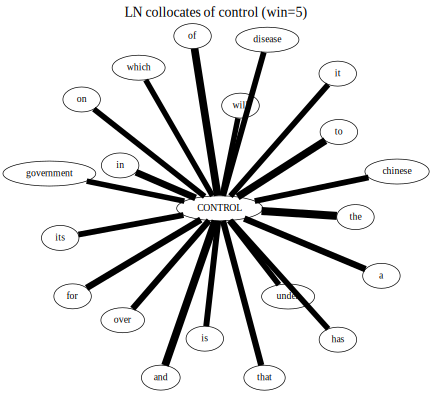

In [12]:
plot_collocates('control', control_colls, num=20, threshold=2,
                title='LN collocates of control (win=5)')

### Collocation of 'communist'

In [13]:
comm_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    comm_colls.update(collocates(tokens, 'communist', win=[5,5]))

In [14]:
comm_colls.most_common()[20:50]

[('its', 238),
 ('from', 210),
 ('as', 194),
 ('said', 177),
 ('ccp', 163),
 ('this', 157),
 ('have', 153),
 ('it', 150),
 ('which', 148),
 ('regime', 142),
 ('are', 136),
 ('not', 123),
 ('or', 111),
 ('an', 102),
 ('their', 99),
 ('was', 99),
 ('but', 98),
 ('be', 90),
 ('will', 82),
 ('they', 82),
 ('officials', 81),
 ('ties', 80),
 ('us', 79),
 ('we', 79),
 ('xi', 79),
 ('who', 76),
 ('he', 76),
 ('members', 76),
 ('at', 75),
 ('companies', 75)]

### Collocation of 'regime'

In [15]:
regime_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    regime_colls.update(collocates(tokens, 'regime', win=[5,5]))

In [16]:
regime_colls.most_common(50)

[('the', 962),
 ('to', 355),
 ('of', 317),
 ('and', 262),
 ('a', 259),
 ('in', 221),
 ('that', 184),
 ('chinese', 157),
 ('communist', 140),
 ('with', 135),
 ('is', 114),
 ('by', 86),
 ('for', 86),
 ('its', 84),
 ('has', 78),
 ('on', 78),
 ('an', 68),
 ('chinas', 66),
 ('as', 66),
 ('this', 65),
 ('censorship', 58),
 ('authoritarian', 57),
 ('it', 56),
 ('control', 53),
 ('china', 51),
 ('export', 41),
 ('be', 39),
 ('maduro', 39),
 ('xi', 39),
 ('us', 34),
 ('our', 32),
 ('we', 32),
 ('said', 31),
 ('new', 30),
 ('will', 30),
 ('have', 30),
 ('from', 30),
 ('but', 29),
 ('not', 29),
 ('government', 29),
 ('or', 29),
 ('against', 27),
 ('under', 27),
 ('jinpings', 27),
 ('are', 27),
 ('his', 26),
 ('hong', 26),
 ('which', 25),
 ('they', 25),
 ('support', 24)]

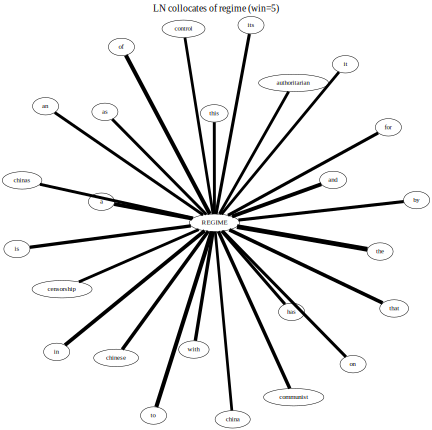

In [17]:
plot_collocates('regime', regime_colls, num=25, threshold=2,
                title='LN collocates of regime (win=5)')

### KWIC of 'influence'

In [18]:
influence_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    influence_colls.update(collocates(tokens, 'influence', win=[5,5]))

In [19]:
influence_colls.most_common(20)

[('the', 1378),
 ('to', 1017),
 ('and', 911),
 ('of', 656),
 ('in', 538),
 ('chinese', 353),
 ('a', 321),
 ('foreign', 310),
 ('on', 301),
 ('that', 221),
 ('operations', 211),
 ('its', 200),
 ('is', 179),
 ('chinas', 178),
 ('china', 168),
 ('with', 151),
 ('over', 147),
 ('us', 145),
 ('for', 143),
 ('as', 143)]

### Collocation of 'concerns'

In [20]:
concerns_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    concerns_colls.update(collocates(tokens, 'concerns', win=[5,5]))

In [21]:
concerns_colls.most_common(20)

[('the', 3451),
 ('to', 1797),
 ('about', 1613),
 ('and', 1347),
 ('of', 1293),
 ('security', 980),
 ('that', 889),
 ('in', 835),
 ('a', 560),
 ('over', 555),
 ('have', 492),
 ('us', 475),
 ('is', 474),
 ('national', 459),
 ('on', 453),
 ('are', 392),
 ('with', 350),
 ('growth', 347),
 ('trade', 340),
 ('chinese', 331)]

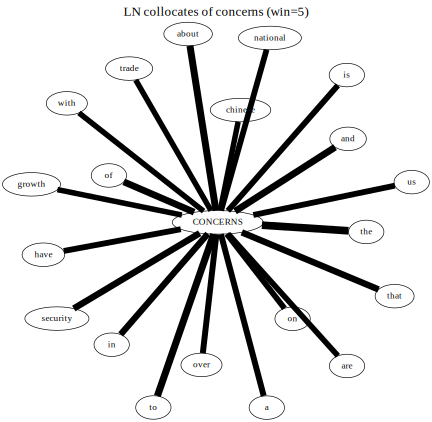

In [22]:
plot_collocates('concerns', concerns_colls, num=20, threshold=2,
                title='LN collocates of concerns (win=5)')

### Collocation of 'freedom'

In [23]:
freedom_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    freedom_colls.update(collocates(tokens, 'freedom', win=[5,5]))

In [24]:
freedom_colls.most_common(20)

[('of', 1558),
 ('the', 1460),
 ('and', 1329),
 ('to', 730),
 ('for', 514),
 ('in', 469),
 ('on', 377),
 ('expression', 370),
 ('religious', 332),
 ('a', 319),
 ('is', 301),
 ('that', 269),
 ('speech', 223),
 ('freedom', 206),
 ('press', 173),
 ('rights', 167),
 ('internet', 145),
 ('as', 139),
 ('china', 138),
 ('hong', 135)]

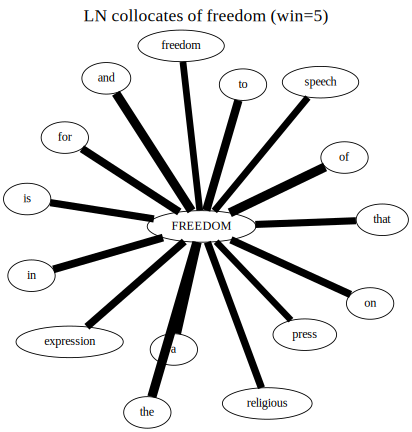

In [25]:
plot_collocates('freedom', freedom_colls, num=15, threshold=2,
                title='LN collocates of freedom (win=5)')

### Collocation of 'huawei'

In [26]:
huawei_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    huawei_colls.update(collocates(tokens, 'huawei', win=[5,5]))

In [27]:
huawei_colls.most_common()[25:50]

[('not', 619),
 ('technology', 619),
 ('security', 581),
 ('huawei', 560),
 ('company', 525),
 ('government', 515),
 ('this', 483),
 ('be', 470),
 ('giant', 460),
 ('technologies', 454),
 ('will', 450),
 ('are', 437),
 ('was', 429),
 ('against', 411),
 ('which', 410),
 ('business', 407),
 ('or', 387),
 ('at', 379),
 ('other', 379),
 ('their', 378),
 ('about', 372),
 ('use', 372),
 ('tech', 370),
 ('but', 349),
 ('networks', 348)]

### Collocation of 'apple'

In [28]:
apple_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    apple_colls.update(collocates(tokens, 'apple', win=[5,5]))

In [29]:
apple_colls.most_common(50)

[('the', 1998),
 ('and', 1621),
 ('aapl', 1337),
 ('to', 1158),
 ('in', 1030),
 ('of', 954),
 ('a', 804),
 ('is', 684),
 ('that', 499),
 ('its', 494),
 ('on', 468),
 ('with', 445),
 ('apple', 418),
 ('for', 387),
 ('will', 325),
 ('google', 324),
 ('has', 319),
 ('as', 307),
 ('from', 305),
 ('are', 301),
 ('shares', 276),
 ('amazon', 238),
 ('it', 233),
 ('at', 231),
 ('us', 222),
 ('by', 208),
 ('this', 204),
 ('facebook', 188),
 ('china', 184),
 ('news', 182),
 ('tv', 180),
 ('about', 180),
 ('an', 174),
 ('like', 171),
 ('stocks', 162),
 ('have', 161),
 ('up', 158),
 ('which', 157),
 ('market', 157),
 ('stock', 156),
 ('technology', 152),
 ('04', 150),
 ('companies', 149),
 ('but', 148),
 ('said', 144),
 ('after', 144),
 ('corporate', 143),
 ('microsoft', 140),
 ('services', 140),
 ('also', 133)]

### Collocation of 'tiktok'

In [30]:
tt_colls = Counter()
for doc in LN2017 + LN2018 + LN2019 + LN2020 + LN2021:
    text = doc['body']
    tokens = tokenize(text, lowercase=True, strip_chars=chars_to_remove)
    tt_colls.update(collocates(tokens, 'tiktok', win=[5,5]))

In [31]:
tt_colls.most_common(25)

[('the', 4273),
 ('to', 2468),
 ('of', 1920),
 ('a', 1706),
 ('and', 1666),
 ('in', 1639),
 ('that', 1344),
 ('is', 1123),
 ('has', 919),
 ('on', 907),
 ('us', 874),
 ('for', 716),
 ('it', 672),
 ('chinese', 658),
 ('app', 622),
 ('its', 597),
 ('from', 585),
 ('with', 578),
 ('by', 557),
 ('as', 536),
 ('said', 480),
 ('be', 436),
 ('bytedance', 434),
 ('data', 412),
 ('ban', 391)]

**Observations**:
* Aside from the neutral/filler words, Huawei and TikTok contain negative collocates: 'giant', 'not', 'security', 'but', 'against', 'ban' while an American brand, Apple doesn't reflect the same story.
    * The search terms were focused on China and the Chinese government, so Apple obviously wouldn't be the focus of the articles, but it's safe to assume that the articles in which Apple may appear in just mention the brand as a "better" market option than Chinese brands.
        * the collocations for Apple are much more focused in and contain more neutral/filler words than positive or negative ones

---